# Project Activity: Automated Decision Trees

## Group Names and Roles

- Heera (Driver)
- Jamie (Proposer)
- Tim (Reviewer)

## Introduction

Last time, you used `pandas` summary tables to create some informed guesses about good *decision trees* -- flow-chart-like rules for making a guess about the species of a penguin. In this activity, we'll use `scikit-learn` to automatically create superior decision trees.

Let's begin by importing all the libraries we'll need, and by downloading the penguins dataset:

*If you experience `ConnectionRefused` errors when doing this, instead copy/paste the url into your browser. Save the data in the same directory as this notebook in a file called `penguins.csv`, and then replace `url` with `"penguins.csv"` in the block below.* 

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import tree, preprocessing
import numpy as np

In [5]:
url = "https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv"
penguins = pd.read_csv(url)

### §1. Preparing your data

For this activity, we will use only the following columns: `"Species"`, `"Flipper Length (mm)"`, `"Body Mass (g)"`, `"Sex"`. (Use the square brackets operator on the list of these strings, and **assign the result back to `penguins`.**)

In [10]:
penguins = penguins[["Species", "Flipper Length (mm)", "Body Mass (g)", "Sex"]]

Next, inspect the `penguins` data frame. You should have 344 rows and 4 columns.

In [11]:
penguins

,Species,Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),181.0,3750.0,MALE
1,Adelie Penguin (Pygoscelis adeliae),186.0,3800.0,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),195.0,3250.0,FEMALE
3,Adelie Penguin (Pygoscelis adeliae),NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),193.0,3450.0,FEMALE
...,...,...,...,...
339,Gentoo penguin (Pygoscelis papua),NaN,NaN,NaN
340,Gentoo penguin (Pygoscelis papua),215.0,4850.0,FEMALE
341,Gentoo penguin (Pygoscelis papua),222.0,5750.0,MALE
342,Gentoo penguin (Pygoscelis papua),212.0,5200.0,FEMALE


You might have noticed that your dataframe contains rows with `NaN` values. Calling `.dropna()` on the dataframe will remove these rows. Do this below, and reassign the result back to `penguins`.

In [12]:
penguins = penguins.dropna()

Look at your dataframe once again. You should have 334 rows and 4 columns.

**Note**: The sex of one of the penguins was not recorded, and the corresponding entry in the `Sex` column is `.`. This won't cause issues, but feel free if you like to remove this row. Now is a good time to do this. 

In [33]:
penguins = penguins[penguins["Sex"] != "."]

penguins

,Species,Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),181.0,3750.0,MALE
1,Adelie Penguin (Pygoscelis adeliae),186.0,3800.0,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),195.0,3250.0,FEMALE
4,Adelie Penguin (Pygoscelis adeliae),193.0,3450.0,FEMALE
5,Adelie Penguin (Pygoscelis adeliae),190.0,3650.0,MALE
...,...,...,...,...
338,Gentoo penguin (Pygoscelis papua),214.0,4925.0,FEMALE
340,Gentoo penguin (Pygoscelis papua),215.0,4850.0,FEMALE
341,Gentoo penguin (Pygoscelis papua),222.0,5750.0,MALE
342,Gentoo penguin (Pygoscelis papua),212.0,5200.0,FEMALE


Run the next cell. Doing this will make sure that the random values that your code will generate will be the same every time you run the code.

In [14]:
np.random.seed(3354354524)

Our goal is to build a model that *predicts the species of a penguin based on the other features* that you now have in the `penguins` dataframe. With this in mind, clean the data, as follows:

- obtain slices `X` and `y` (predictor variables and target variable) from the `penguins` dataframe

- encode the sex (inside `X`) and the species (`y`) of the penguins as integers

In [42]:
X = penguins.drop(["Species"], axis = 1)
le = preprocessing.LabelEncoder() 
X["Sex"] =le.fit_transform(X["Sex"])
y = le.fit_transform(penguins["Species"])

To make sure that you know what is going on, look at your `X` and `y` variables by running the next cells.

In [41]:
X

,Flipper Length (mm),Body Mass (g),Sex
0,181.0,3750.0,1
1,186.0,3800.0,0
2,195.0,3250.0,0
4,193.0,3450.0,0
5,190.0,3650.0,1
...,...,...,...
338,214.0,4925.0,0
340,215.0,4850.0,0
341,222.0,5750.0,1
342,212.0,5200.0,0


In [43]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

Now split `X` and `y` into training and test data (80/20% of the rows).

**Note**: *You should conduct all splits using a single call to the function `train_test_split` from `sklearn.model_selection`.* You can achieve this by supplying two arrays to this function, as illustrated in the [second example here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### §2. Training a model

Using the training data you generated in the previous part, train a decision tree classification model `T` with a `max_depth` value of 20. Score your model **against the training data**. Then score your model again, this time **against the test data**. Print both scores and observe the output.

In [54]:
T = tree.DecisionTreeClassifier(max_depth=20)
T.fit(X_train,y_train)

print(T.score(X_train, y_train))
print(T.score(X_test, y_test))

0.9924812030075187
0.7313432835820896


Again, using the training data you generated in the previous part, train another model, also named `T`. This time, use a `max_depth` value of 3. Just as above, score your model **against the training data**, and again **against the test data**. Print both scores and observe the output.

In [52]:
T = tree.DecisionTreeClassifier(max_depth=3)
T.fit(X_train,y_train)

print(T.score(X_train, y_train))
print(T.score(X_test, y_test))

0.8345864661654135
0.8059701492537313


Discuss your observations in the next cell. Which model is better? Is a model better when it performs better against the training data or the test data? Why does one model perform better against the training data while the other performs better against the test data?

---

*The higher depth was better with the training data and worse for the test data. The lower depth was better on average for both. The model with lower depth is better because it scores higher for the test data. One has less depth so it performs better.*

---

Run the next cell to visualize your model.

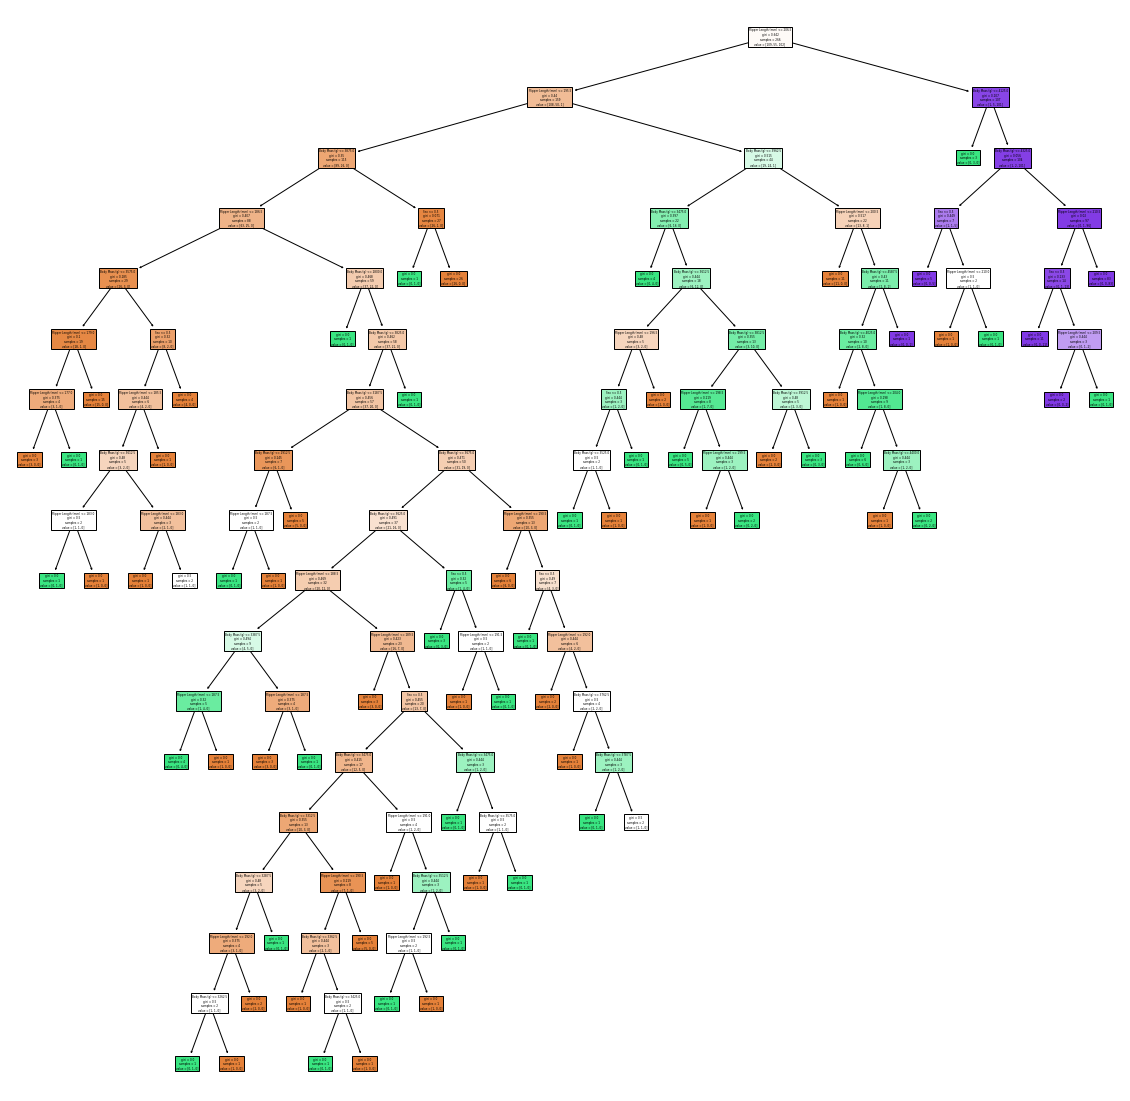

In [55]:
fig, ax = plt.subplots(1, figsize = (20, 20))
p = tree.plot_tree(T, filled = True, feature_names = X.columns)

### §3. Cross-validation

Now estimate the optimal tree depth using cross-validation, and plot the results, as follows.

Make an empty plot. The x-axis will be the tree depth, and the y-axis will be the cross-validation score. Label your axes.

Make a `for` loop that will test a particular tree depth, between 1 and 30. On each iteration, train a decision tree model of the given depth and calculate its cross-validation score. Plot the depth and the score in your scatterplot. Then compare your score to the best score you have so far, and update the best score and best max depth if the new score is better.

In [60]:
x_axis = list(range(1,31))
print(x_axis)
y_axis = cross_val_score(T, X_train, y_train, cv=x_axis)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


NameError: name 'cross_val_score' is not defined

Lastly, train a decision tree classification model `T` using the best max depth. Score the model against the test data. Print the score and observe the output.